In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("kmeans.csv")
df.head()

,x,y
0,1,1
1,2,2
2,2,3
3,1,4
4,3,3


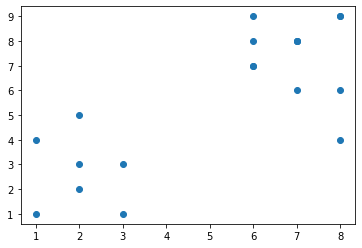

In [3]:
plt.scatter(df['x'],df['y'])
plt.show()

In [7]:
from sklearn.cluster import KMeans
k=3
kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(df)

In [8]:
labels = kmeans.predict(df)

In [9]:
print(labels)
centroids = kmeans.cluster_centers_
print(centroids)

[1 1 1 1 1 2 2 2 0 2 1 2 2 2 2 1 0 0 2]
[[7.66666667 5.33333333]
 [2.         2.71428571]
 [6.77777778 8.11111111]]


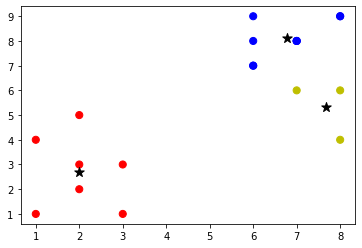

In [13]:
c = ['b','r','y']
colors = [c[i] for i in labels]

plt.scatter(df['x'],df['y'], c=colors, s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=100, c='black')
plt.show()

In [15]:
from sklearn import metrics


silhouette_samples = metrics.silhouette_samples(df, kmeans.labels_)
print(silhouette_samples)

print("Average of Silhouette Coefficients for k =", k)
print("============================================")
print("Silhouette mean:", silhouette_samples.mean())

[0.67534567 0.73722797 0.73455072 0.66254937 0.6323039  0.33332111
 0.63792468 0.58821402 0.29141777 0.59137721 0.50802377 0.63792468
 0.52511161 0.33332111 0.63792468 0.60168807 0.51664787 0.42831295
 0.52511161]
Average of Silhouette Coefficients for k = 3
Silhouette mean: 0.5578051985195768


Silhouette Coefficients for k = 2 is 0.6897112069939448
Silhouette Coefficients for k = 3 is 0.5578051985195768
Silhouette Coefficients for k = 4 is 0.4430381814640289
Silhouette Coefficients for k = 5 is 0.4424248576948773
Silhouette Coefficients for k = 6 is 0.41576163256548826
Silhouette Coefficients for k = 7 is 0.4569094843063473
Silhouette Coefficients for k = 8 is 0.43024625917695825
Silhouette Coefficients for k = 9 is 0.43985823083018905
Silhouette Coefficients for k = 10 is 0.5124113408422506
Silhouette Coefficients for k = 11 is 0.4695564671186216
Silhouette Coefficients for k = 12 is 0.4409831398126504
Silhouette Coefficients for k = 13 is 0.4255677072435213
Silhouette Coefficients for k = 14 is 0.4101522746743922
Silhouette Coefficients for k = 15 is 0.3684210526315789


c:\users\accessible ai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (16). Possibly due to duplicate points in X.
  import sys


Silhouette Coefficients for k = 16 is 0.3684210526315789


c:\users\accessible ai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (17). Possibly due to duplicate points in X.
  import sys


Silhouette Coefficients for k = 17 is 0.3684210526315789
Silhouette Coefficients for k = 18 is 0.3684210526315789
Optimal K is  2


c:\users\accessible ai\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: ConvergenceWarning: Number of distinct clusters (15) found smaller than n_clusters (18). Possibly due to duplicate points in X.
  import sys


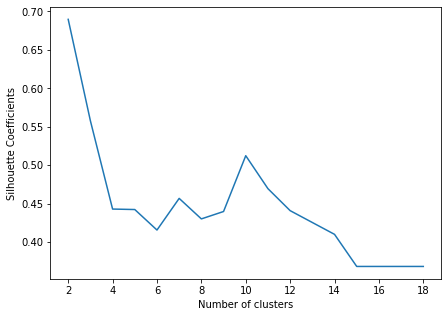

In [20]:
silhouette_avgs = []
min_k = 2

#---try k from 2 to maximum number of labels---

for k in range(min_k, len(df)):    
    kmean = KMeans(n_clusters=k).fit(df)    
    score = metrics.silhouette_score(df, kmean.labels_)    
    print("Silhouette Coefficients for k =", k, "is", score)    
    silhouette_avgs.append(score)
    
f, ax = plt.subplots(figsize=(7, 5))
ax.plot(range(min_k, len(df)), silhouette_avgs)

plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Coefficients")

#---the optimal k is the one with the highest average silhouette---
Optimal_K = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is ", Optimal_K)

In [10]:
df = pd.read_csv("bmx.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950 entries, 0 to 9949
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seqn      9950 non-null   int64  
 1   bmxwt     9847 non-null   float64
 2   bmxht     8962 non-null   float64
 3   bmxbmi    8949 non-null   float64
 4   bmxwaist  8672 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 388.8 KB


,seqn,bmxwt,bmxht,bmxbmi,bmxwaist
0,31127,10.2,NaN,NaN,NaN
1,31128,40.1,151.6,17.45,62.8
2,31129,74.6,167.7,26.53,97.8
3,31130,NaN,NaN,NaN,NaN
4,31131,75.2,156.0,30.90,96.0


In [11]:
df.isnull().sum()

seqn           0
bmxwt        103
bmxht        988
bmxbmi      1001
bmxwaist    1278
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8655 entries, 1 to 9949
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seqn      8655 non-null   int64  
 1   bmxwt     8655 non-null   float64
 2   bmxht     8655 non-null   float64
 3   bmxbmi    8655 non-null   float64
 4   bmxwaist  8655 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 405.7 KB


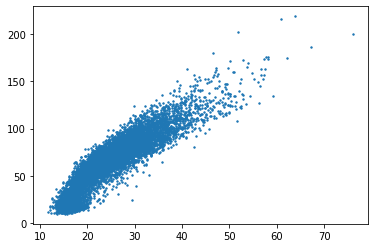

In [20]:
plt.scatter(df['bmxbmi'],df['bmxwt'], s=2)
plt.show()